
# IFI 8420 - Assignment 3: Logistic Regression

## (Group Submission)

**Note:** Quiz 3B in iCollege will be based on this Assignment. Please have your R program available in running condition when you take the quiz. You will need solutions of your program to take the quiz. Quiz 3B is not under lockdown browser.
    


## Part 1 (100 points)

Analyze the data in the **CreditCard** dataset in the `AER` package. (Note that you have to install the `AER` package and any other additional packages required by `AER`.)
    


### Variables in the dataset:

1. **card**: Was the application for a card accepted? (Binary: 1/0) - Response Variable
2. **reports**: Number of major derogatory reports 
3. **income**: Yearly income (in USD 10,000)
4. **age**: Age in years plus 12ths of a year 
5. **owner**: Does the individual own their home? 
6. **dependents**: Number of dependents 
7. **months**: Months living at the current address
8. **share**: Ratio of monthly credit card expenditure to yearly income
9. **selfemp**: Is the individual self-employed?
10. **majorcards**: Number of major credit cards held
11. **active**: Number of active credit accounts
12. **expenditure**: Average monthly credit card expenditure
    

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### A. Provide summary statistics of the predictors. (5 points)

In [185]:
# Display summary statistics of predictors
df = pd.read_csv(r"CreditCard.csv")
predictors = ['reports', 'income', 'age', 'owner', 'dependents', 'months', 'share']
df[predictors].describe()
    

,reports,income,age,dependents,months,share
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,3.365376,33.213103,0.993935,55.267627,0.068732
std,1.345267,1.693902,10.142783,1.247745,66.271746,0.094656
min,0.000000,0.210000,0.166667,0.000000,0.000000,0.000109
25%,0.000000,2.243750,25.416670,0.000000,12.000000,0.002316
50%,0.000000,2.900000,31.250000,1.000000,30.000000,0.038827
75%,0.000000,4.000000,39.416670,2.000000,72.000000,0.093617
max,14.000000,13.500000,83.500000,6.000000,540.000000,0.906320


### B. Consider only data with `age > 18` for the rest of the analysis. (5 points)

In [186]:
df = df[df['age'] > 18]
print(df.head())

  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


### C. Plot of income vs. reports: mark individuals with card application accepted as blue, and not accepted as red. (5 points)

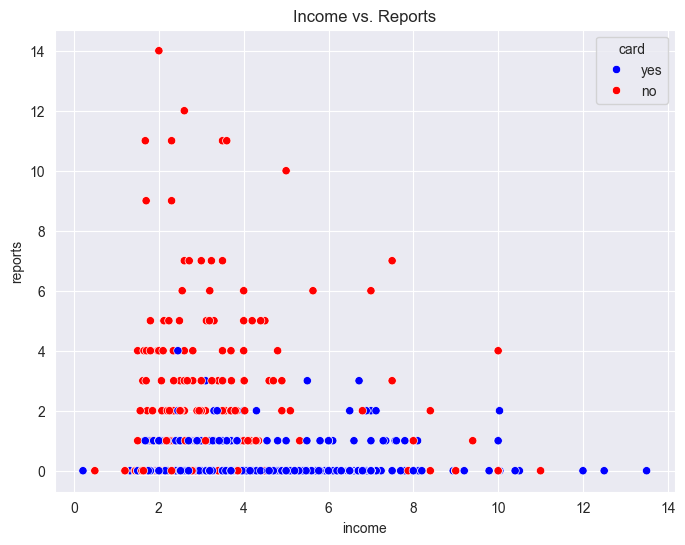

In [187]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='income', y='reports', hue='card', palette={'yes': 'blue', 'no': 'red'})
plt.title('Income vs. Reports')
plt.show()

### D. Boxplots of income and reports as a function of card acceptance status. (5 points)

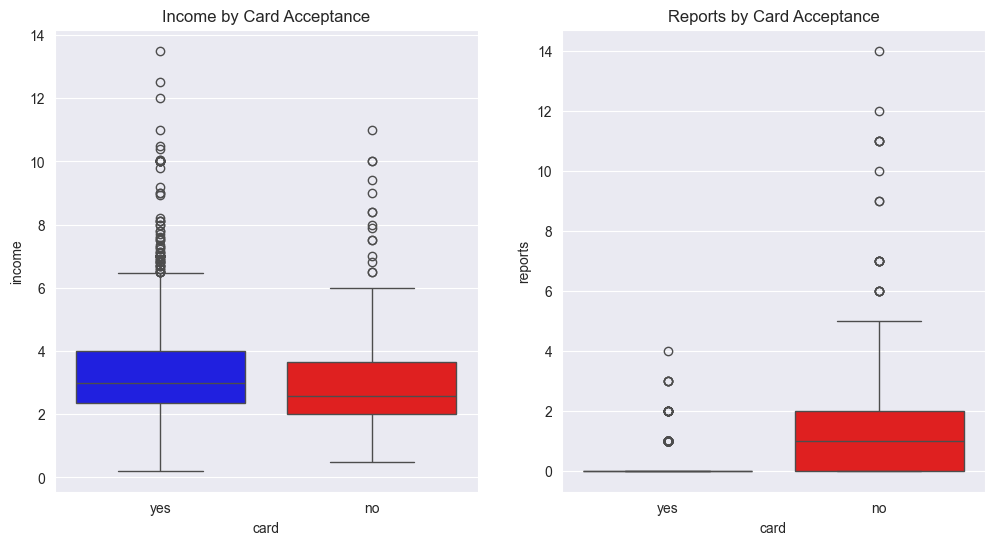

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='card', y='income', data=df, ax=axes[0], hue='card', palette={'yes': 'blue', 'no': 'red'})
sns.boxplot(x='card', y='reports', data=df, ax=axes[1], hue='card', palette={'yes': 'blue', 'no': 'red'})
axes[0].set_title('Income by Card Acceptance')
axes[1].set_title('Reports by Card Acceptance')
plt.show()
    

### E. Construct the histogram for the predictors. (5 points)

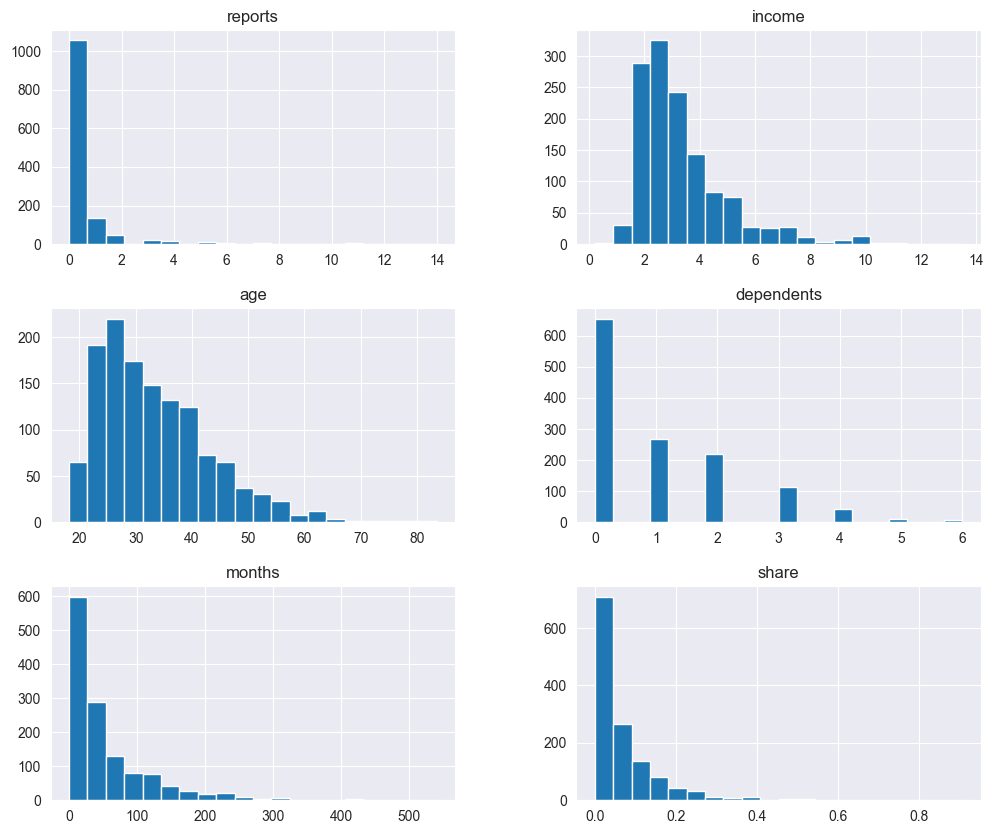

In [189]:
df[predictors].hist(figsize=(12,10), bins=20)
plt.show()

### F. Transform `share` and `reports` due to skewness.

In [190]:
df['log_share'] = np.log(df['share'])
df['log_reports'] = np.log(df['reports'] + 1)
print(df.head())

  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  log_share  log_reports  
0           3      54           1      12  -3.403102          0.0  
1           3      34           1      13  -5.255844          0.0  
2           4      58           1       5  -5.483309          0.0  
3           0      25           1       7  -2.730084          0.0  
4           2      64           1       5  -2.702308          0.0  


### G. Logistic Regression with predictors 2 to 8. (5 points)

In [192]:
# For some reason this has to be ran twice in order for it to work.
X = df.iloc[:, 1:8]
y = df['card']
df['owner'] = df['owner'].replace({'yes': 1, 'no': 0})
df['selfemp'] = df['selfemp'].replace({'yes': 1, 'no': 0})
df['card'] = df['card'].replace({'yes': 1, 'no': 0})
model = LogisticRegression()
model.fit(X, y)

print(df.head())
    

   card  reports       age  income     share  expenditure  owner  selfemp  \
0     1        0  37.66667  4.5200  0.033270   124.983300      1        0   
1     1        0  33.25000  2.4200  0.005217     9.854167      0        0   
2     1        0  33.66667  4.5000  0.004156    15.000000      1        0   
3     1        0  30.50000  2.5400  0.065214   137.869200      0        0   
4     1        0  32.16667  9.7867  0.067051   546.503300      1        0   

   dependents  months  majorcards  active  log_share  log_reports  
0           3      54           1      12  -3.403102          0.0  
1           3      34           1      13  -5.255844          0.0  
2           4      58           1       5  -5.483309          0.0  
3           0      25           1       7  -2.730084          0.0  
4           2      64           1       5  -2.702308          0.0  


### H. Convert probabilities into class labels and compute confusion matrix. (15 points)

In [193]:
y_prob = model.predict_proba(X)[:, 1]
y_pred = (y_prob > 0.5).astype(int)

print(confusion_matrix(y, y_pred))
print(f'Accuracy: {accuracy_score(y, y_pred)}')
    

[[295   0]
 [ 23 994]]
Accuracy: 0.9824695121951219


### I. Fit logistic regression model using training data (1-1000), test on remaining. (20 points)

In [194]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
X_train, y_train = train[X.columns], train['card']
X_test, y_test = test[X.columns], test['card']

model.fit(X_train, y_train)
y_test_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

print(confusion_matrix(y_test, y_test_pred))
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')

[[ 84   0]
 [  5 305]]
Accuracy: 0.9873096446700508


### J. Apply Discriminant Analysis, Nearest Neighbors, and Naïve Bayes, compare models. (20 points)

In [195]:
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    print(f'--- {name} ---')
    print(confusion_matrix(y_test, preds))
    print(f'Accuracy: {accuracy_score(y_test, preds)}')
    

--- LDA ---
[[ 29  55]
 [  1 309]]
Accuracy: 0.8578680203045685
--- KNN ---
[[ 83   1]
 [  7 303]]
Accuracy: 0.9796954314720813
--- Naive Bayes ---
[[ 84   0]
 [  4 306]]
Accuracy: 0.9898477157360406


### K. Comparing models - Final selection and validation. (15 points)

In [196]:
# Model comparison summary
def compare_models():
    best_model = max(models, key=lambda name: accuracy_score(y_test, models[name].predict(X_test)))
    return f'The best performing model is {best_model} due to higher accuracy.'

print(compare_models())
    

The best performing model is Naive Bayes due to higher accuracy.
